In [48]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [2]:
#load dataset
df=pd.read_csv(r"C:\Users\Abel\Downloads\Laptop_review.txt",delimiter=' , ')

<ipython-input-2-1cd40898c521>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(r"C:\Users\Abel\Downloads\Laptop_review.txt",delimiter=' , ')


In [3]:
df

,Text
0,Extremely overpriced. At this price range we g...
1,This laptop I bought after intense search I fo...
2,I have purchased this model (Legion 5i intel 1...
3,Loved the laptop. Got it for 79K and I think i...
4,Unlike ROGs and MSIs of the world it's build s...
5,Heating and thermal management is on point. co...
6,"It is bit thick, but for a good cause, which a..."
7,It's a decent laptop for the price. The displa...
8,U can go for it.. premium level..other than ba...
9,Dear friends i am writing the review after one...


In [4]:
#strip the trailings and leadings
laptop= [Text.strip() for Text in df.Text]
laptop[0:5]

['Extremely overpriced. At this price range we get hp omen 15 ryzen 4600h and gtx 1660ti which is far better than this. Disappointment from lenovo',
 'This laptop I bought after intense search I found out this was the best Gaming laptop out there and thankfully it was validated when I got it !!',
 'I have purchased this model (Legion 5i intel 10th gen / gtx 1650 ti/ 250 nits 120 hz refresh rate/256 gb ssd 1tb hdd)',
 "Loved the laptop. Got it for 79K and I think it's worth every rupee. If you are looking for a laptop for your academic or professional requirement with a bit of casual gaming, I'd highly recommend this laptop.",
 "Unlike ROGs and MSIs of the world it's build so good, at this price point it's the best. Built out of plastic yet feels like tank."]

In [9]:
#join the sentences
sentences1 = ''.join(laptop)
sentences1

"Extremely overpriced. At this price range we get hp omen 15 ryzen 4600h and gtx 1660ti which is far better than this. Disappointment from lenovoThis laptop I bought after intense search I found out this was the best Gaming laptop out there and thankfully it was validated when I got it !!I have purchased this model (Legion 5i intel 10th gen / gtx 1650 ti/ 250 nits 120 hz refresh rate/256 gb ssd 1tb hdd)Loved the laptop. Got it for 79K and I think it's worth every rupee. If you are looking for a laptop for your academic or professional requirement with a bit of casual gaming, I'd highly recommend this laptop.Unlike ROGs and MSIs of the world it's build so good, at this price point it's the best. Built out of plastic yet feels like tank.Heating and thermal management is on point. cools like nothing else.It is bit thick, but for a good cause, which again is surprisingly isn't that heavy!It's a decent laptop for the price. The display is good and vibrant, it never dissappoints. The perform

In [14]:
#removing numbers
import re
no_punc_elon_text2= re.sub("[0-9" "]+"," ",sentences1)
no_punc_elon_text2

"Extremely overpriced. At this price range we get hp omen   ryzen  h and gtx  ti which is far better than this. Disappointment from lenovoThis laptop I bought after intense search I found out this was the best Gaming laptop out there and thankfully it was validated when I got it !!I have purchased this model (Legion  i intel  th gen / gtx   ti/   nits   hz refresh rate/  gb ssd  tb hdd)Loved the laptop. Got it for  K and I think it's worth every rupee. If you are looking for a laptop for your academic or professional requirement with a bit of casual gaming, I'd highly recommend this laptop.Unlike ROGs and MSIs of the world it's build so good, at this price point it's the best. Built out of plastic yet feels like tank.Heating and thermal management is on point. cools like nothing else.It is bit thick, but for a good cause, which again is surprisingly isn't that heavy!It's a decent laptop for the price. The display is good and vibrant, it never dissappoints. The performance is fabulous. 

In [21]:
#removing the punctuation marks
import string
no_punc_elon_text3 = no_punc_elon_text2.translate(str.maketrans('', '', string.punctuation))
no_punc_elon_text3

'Extremely overpriced At this price range we get hp omen   ryzen  h and gtx  ti which is far better than this Disappointment from lenovoThis laptop I bought after intense search I found out this was the best Gaming laptop out there and thankfully it was validated when I got it I have purchased this model Legion  i intel  th gen  gtx   ti   nits   hz refresh rate  gb ssd  tb hddLoved the laptop Got it for  K and I think its worth every rupee If you are looking for a laptop for your academic or professional requirement with a bit of casual gaming Id highly recommend this laptopUnlike ROGs and MSIs of the world its build so good at this price point its the best Built out of plastic yet feels like tankHeating and thermal management is on point cools like nothing elseIt is bit thick but for a good cause which again is surprisingly isnt that heavyIts a decent laptop for the price The display is good and vibrant it never dissappoints The performance is fabulous But battery is not upto mark bu

In [22]:
#removing special characters
no_punc_elon_text4 = "".join(u for u in no_punc_elon_text3 if u not in ("�",'\n','🔥'))

print(no_punc_elon_text4)

Extremely overpriced At this price range we get hp omen   ryzen  h and gtx  ti which is far better than this Disappointment from lenovoThis laptop I bought after intense search I found out this was the best Gaming laptop out there and thankfully it was validated when I got it I have purchased this model Legion  i intel  th gen  gtx   ti   nits   hz refresh rate  gb ssd  tb hddLoved the laptop Got it for  K and I think its worth every rupee If you are looking for a laptop for your academic or professional requirement with a bit of casual gaming Id highly recommend this laptopUnlike ROGs and MSIs of the world its build so good at this price point its the best Built out of plastic yet feels like tankHeating and thermal management is on point cools like nothing elseIt is bit thick but for a good cause which again is surprisingly isnt that heavyIts a decent laptop for the price The display is good and vibrant it never dissappoints The performance is fabulous But battery is not upto mark but

In [23]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_elon_text4)
print(text_tokens)

['Extremely', 'overpriced', 'At', 'this', 'price', 'range', 'we', 'get', 'hp', 'omen', 'ryzen', 'h', 'and', 'gtx', 'ti', 'which', 'is', 'far', 'better', 'than', 'this', 'Disappointment', 'from', 'lenovoThis', 'laptop', 'I', 'bought', 'after', 'intense', 'search', 'I', 'found', 'out', 'this', 'was', 'the', 'best', 'Gaming', 'laptop', 'out', 'there', 'and', 'thankfully', 'it', 'was', 'validated', 'when', 'I', 'got', 'it', 'I', 'have', 'purchased', 'this', 'model', 'Legion', 'i', 'intel', 'th', 'gen', 'gtx', 'ti', 'nits', 'hz', 'refresh', 'rate', 'gb', 'ssd', 'tb', 'hddLoved', 'the', 'laptop', 'Got', 'it', 'for', 'K', 'and', 'I', 'think', 'its', 'worth', 'every', 'rupee', 'If', 'you', 'are', 'looking', 'for', 'a', 'laptop', 'for', 'your', 'academic', 'or', 'professional', 'requirement', 'with', 'a', 'bit', 'of', 'casual', 'gaming', 'Id', 'highly', 'recommend', 'this', 'laptopUnlike', 'ROGs', 'and', 'MSIs', 'of', 'the', 'world', 'its', 'build', 'so', 'good', 'at', 'this', 'price', 'point',

In [25]:
final = pd.DataFrame(text_tokens,columns=['words'])
final

,words
0,Extremely
1,overpriced
2,At
3,this
4,price
...,...
415,rest
416,everything
417,is
418,pretty


In [39]:
#removing the stopwords
from nltk.corpus import stopwords
en_stops = list(stopwords.words('english'))
en_stops.append('I')
en_stops.append('U')
en_stops.append('F')
en_stops.append('ti')
en_stops.append('game')
en_stops.append('u')
en_stops.append('is')
en_stops.append('h')
en_stops.append('laptop')

st_p=[word for word in final['words'] if not word in en_stops]

In [40]:
#Noramalize the data
lower_words = [x.lower() for x in st_p ]
print(lower_words[0:25])

['extremely', 'overpriced', 'at', 'price', 'range', 'get', 'hp', 'omen', 'ryzen', 'gtx', 'far', 'better', 'disappointment', 'lenovothis', 'bought', 'intense', 'search', 'found', 'best', 'gaming', 'thankfully', 'validated', 'got', 'purchased', 'model']


In [41]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['extrem', 'overpr', 'at', 'price', 'rang', 'get', 'hp', 'omen', 'ryzen', 'gtx', 'far', 'better', 'disappoint', 'lenovothi', 'bought', 'intens', 'search', 'found', 'best', 'game', 'thank', 'valid', 'got', 'purchas', 'model', 'legion', 'intel', 'th', 'gen', 'gtx', 'nit', 'hz', 'refresh', 'rate', 'gb', 'ssd', 'tb', 'hddlove', 'got', 'k']


In [42]:
#dataframe
final_df=pd.DataFrame(stemmed_tokens,columns=['words'])
final_df

,words
0,extrem
1,overpr
2,at
3,price
4,rang
...,...
229,display
230,rest
231,everyth
232,pretti


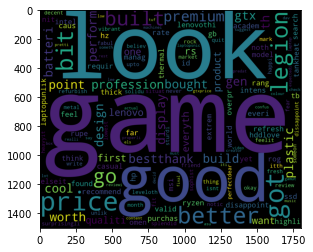

In [43]:
#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

string_Total = " ".join(final_df["words"])
wordcloud_stw = WordCloud(width = 1800,height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw)

In [44]:
#import affin lexicon
afinn = pd.read_csv('E:/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [45]:
#defining the custom function
from itertools import islice

def take(n, iterable):
    return list(islice(iterable, n))

In [46]:
#setting the affin_scores
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [49]:
#defining the custom function for the text
nlp = spacy.load('en_core_web_sm')
def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores .get(word.lemma_, 0)
    return sent_score

In [51]:
#checking affin lexicon
calculate_sentiment(text = 'i am sad')

-2

In [52]:
#checking the sentiment scores of the text words
final_df['sentiment_value'] = final_df['words'].apply(calculate_sentiment)
final_df

,words,sentiment_value
0,extrem,0
1,overpr,0
2,at,0
3,price,0
4,rang,0
...,...,...
229,display,0
230,rest,0
231,everyth,0
232,pretti,0


In [56]:
final_df.sort_values(by='sentiment_value')

,words,sentiment_value
124,fear,-2
12,disappoint,-2
0,extrem,0
144,someon,0
145,look,0
...,...,...
88,good,3
89,vibrant,3
104,splendid,3
18,best,3


<AxesSubplot:xlabel='sentiment_value', ylabel='count'>

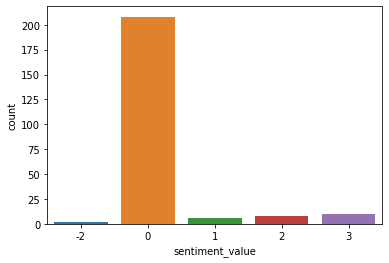

In [63]:
#visualizing
sns.countplot(x='sentiment_value',data=final_df)

## Most of the words are neutral and positive which depitcts positive emotion of the laptop review from amazon